### Importing the libraries

In [22]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Data:
We sourced the data from [The World Bank](https://data.worldbank.org/indicator/SP.POP.TOTL?locations=1W). The data has population measurements between 1960 and 2020 for all countries and regions in the world, along with an aggregate measurement. For our models we used the aggregate measurement of total world population, as this provided the most complete forecast.

During the data sourcing process we also evaluated another dataset which had world population data between 3000 BC and 2020, but we did not find it appropriate to use because most of the data was estimated based on other models, rather than a census. We found it unsuitable to use data which had been estimated by other estimations to train our data and instead chose the dataset which consisted of census-backed data.

In the late 1950s, the United Nations published international standards for conducting a census. With these new standards in place, census data became more accurate and reliable. With this, we can assume that the historical population data set we are using has a high degree of accuracy since it begins after 1960. Because of this, we are confident that the data has very little inaccuracies and the probability of it introducing bias into our models is low.

### Loading the data

In [23]:
df = pd.read_csv('PopulationData.csv')
world_data = df[df['Country Name'] == 'World']

### Formatting the data

In [24]:
population_data = world_data.to_numpy()[0][4:].astype(float) # Removing the first few non-data columns
for i in range(len(population_data)):
    population_data[i] = population_data[i]/1000000000 # Converting to billions to prevent overflow errors

years = world_data.columns.to_numpy()[4:] # Removing the first few non-data columns
for i in range(len(years)): # Converting the years to integers
    years[i] = years[i][:4]
years = years.astype(float)

# Model:
After conducting some research, we found that many environmental researchers and scientists agree that population growth follows a logistic growth model. This is due to a species’ population growing exponentially at first, and then leveling off when the population reaches the carrying capacity of their environment.


<center> f(x) = L/(1+e^(k(x-x0))) </center>




In [25]:
# Source: https://stackoverflow.com/questions/60160803/scipy-optimize-curve-fit-for-logistic-function
def logistic_function(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b


We utilized sklearn’s curve fit function to fit this equation to our data by modifying the parameters: L, k and x0. After fitting the data, we got an r-squared correlation coefficient of 0.9999028722736413 which proves to be an almost perfect fit to our data.

In [26]:
params, covariance = curve_fit(logistic_function, years, population_data, p0=[2, 1960, .5, 2000]) # p0 is the initial guess for the parameters
r2 = r2_score(population_data, logistic_function(years, *params)) # Calculating the R^2 value
print('R-Squared:', r2)

R-Squared: 0.9999028722736413


# Making the prediction for 2122:

In [27]:
prediction = logistic_function(2122, *params)
print('Prediction for 2122:', round(prediction*1000000000), "people")

Prediction for 2122: 11677851228 people


# Plotting the data:

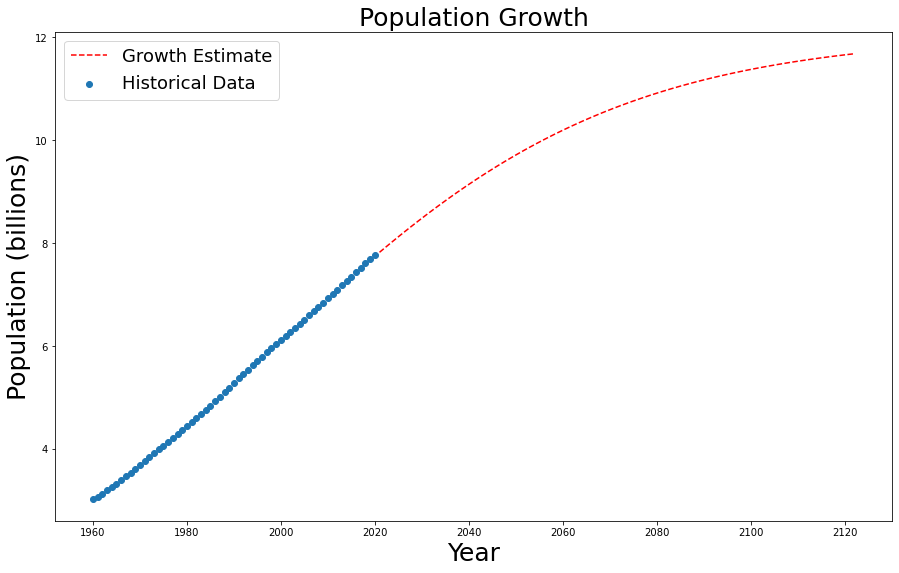

In [28]:
forecasted_years = np.linspace(2021, 2122) # Years to predict
plt.figure(figsize=(15,9))
plt.scatter(years, population_data, label='Historical Data') # Plotting the historical data
plt.plot(forecasted_years, logistic_function(forecasted_years, *params), 'r--',label='Growth Estimate') # Plotting the forecasted data
plt.legend(fontsize=18)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Population (billions)', fontsize=25)
plt.title('Population Growth', fontsize=25)
plt.show()

# Validation:
Our results are similar to predictions made by the United Nations’ Department of Economic and Social Affairs. The UN predicts that in the year 2100, the population will be 10,875,393,719, while our model predicts there will be 11,373,304,881 people on this planet. This fits comfortably within the UN’s 95% confidence interval between 9,424,390,594 and 12,663,070,008. 

# Failed Models:
## Polynomial Fit:
One method we used to predict world population in 2122 was to run a polynomial regression on our dataset, and then use the created model to then approximate population by year. To accomplish this, we used numpy’s “polyfit” to calculate our coefficients to pass into our 1-dimensional polynomial class that would ultimately serve as our model. After the model was constructed we used metrics provided by sklearn to determine how accurate the fit was. Within this library exists a method named “r2_score” that essentially scores the accuracy of the regression with a 1.0 being the best possible score. The score our fit received was 0.9999094449058586 which is very near to 1.0. This coefficient of determination allowed us to know our model was fairly accurate and we could continue with further approximations. We then used this model to predict the population in 2122 as about 7,265,750,433 which is fairly off of the United Nations’ estimate of around 11 billion around 2100. A more detailed view of the data can be visualized in the graph below:

![](charts/PolynomialRegression.png)

This graph was constructed using the matplotlib.pyplot library and allows us to see the approximated population over the next 100 years. As seen in the graph, the population appears to take a drastic turn around the year 2070 at a population count of about 10 billion. Over the next 50 years, all progress made in population growth is lost as billions of people die off and the population count appears to be very similar to when it started 100 years earlier in 2022. Our predicted population of 7,265,750,433 people is about 3.7 billion people short of the prediction made by the United Nations thus further inspiring us to explore other alternatives.

## Exponential Fit:
It can be easily said that the exponential regression is the least accurate form that was used in trying to find what the population will be in 2122, but just because it is the least accurate does not mean that the process of building the exponential model was not difficult. The process started like all the rest, taking in the data and reading it without using pandas. This created two separate lists consisting of a “years” list as well as a “world_data” list which is just all the numbers that coincide with each other across the lists. In order to later polyfit the data that is to be used in order to create the exponential graph, the arrays have to be one-dimensional, which means that we have to “flatten” the arrays. We did this because when the data was sorted, it was sorted as a matrix, with each sub array containing the singular piece of data that was needed (e.g. [[2001],[2002],[2003]]). After that, in accordance with the equation for exponential regression, we took the logarithm of the world data and saved it as a new variable which was later used when we were looking for the constant coefficients that are important in an exponential equation. After finding those coefficients, we created a loop to append the predicted population values of each year to an array so that we could later access it to plot it out. This is the point where we realized that the predicted population value was extremely unrealistic. When we plotted we realized that the plot would reach 40 billion by 2122, which is just not possible for two reasons. Firstly, the UN predicts that the world population will only reach 40 billion by 2122; Secondly, scientifically the Earth would not be able to hold this many people before utterly collapsing.

![](charts/ExponentialRegression.png)

## Logarithmic Fit:
To evaluate what a logarithmic estimate would be, we ran a regression in python. First the existing data would need to be fit to a logarithmic function in order to find our logarithmic function's coefficients. Using numpy's polyfit, we were able to get our coefficients A=160561723725.06 and B=-1214301175386.19 to the function y = A log(x) + B. After executing our code and analyzing our results, this turned out to be a fair bit off the United Nations' estimate of around 11 billion at 15.6 billion being estimated for 2122. This is likely due to the lack of logarithmic data to fit a curve to. The data from the past world populations fits much more closely to a linear line than a logarithmic. This leads the polyfit function to create a very large arc in its approximate function with very large coefficients. This minimizes the effect that taking the log has on the number and continues in a very linear-looking graph. The only point this approximate function would begin to appear logarithmic in appearance is when zooming very far out. The method by which we approximated the log fit is very similar to the exponential, logistic, and polynomial fits we made. Simply take the existing data and run a numpy polyfit to identify the best approximate coefficients. Then, use the newfound coefficients to create estimated data points for the years 2023-2122. These numbers can be found by plugging in the year to the equation mentioned above and this will approximate the estimated population. However it continues to be an overestimate as the population isn't projected to grow as fast according to the United Nations. Through this process the projected data was created and made into a graph using metplotlib.plylot library.

![](charts/LogarithmicRegression.png)

From the graph, and more specifically the equation, we could see that 160,561,723,725.06 * log(2122) - 1,214,301,175,386.19 would evaluate to nearly 16 billion people. This is roughly 5 billion or around 45% more than the likely estimate created by the United Nations of 11 billion. Suffice to say, we ended up going with another, more-likely-accurate model we created.

## Scientific Population Growth (using births and death rates):
The last part that we worked on was the model we initially wanted to use as further validation of one of our initial four models (linear, exponential, logistic, and polynomial). We did this by first creating a logistic function with the assistance of stack overflow. We also knew that later on, it would be necessary to have a function that calculates population growth, so we drew that up early to keep our code concise. Then we read in the data from our csv file and separated the birth and death rates from 2000 – 2021. After that, to prevent an overflow error from later occurring, which we only learned existed by trial and error, we divided our birth and death rates by a million. From there I flattened the numpy arrays into 1D arrays as opposed to 2D arrays. After that, we used the covariance to calculate the r2 score for both the birth and the death rates. Using the r2 score we were able to calculate the prediction for births and deaths in the year 2122, but that information wasn’t helpful without having the full list of births and death rates calculated for every year till 2122, so we calculated and created an array of birth and death rates all the way until 2122. Using that, we were able to create a loop that used the current world population as well as the birth and death rates to calculate the world population for the next year, repeating that cycle until 2122. After doing this, we discovered that this model is extremely inaccurate with the total population falling to a negative number of people by 2122.

![](charts/ScientificGrowth.png)

